In [232]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# parameters
N = 100
G = nx.cycle_graph(N)
A = nx.to_numpy_array(G)
X_ini = np.random.rand(N)

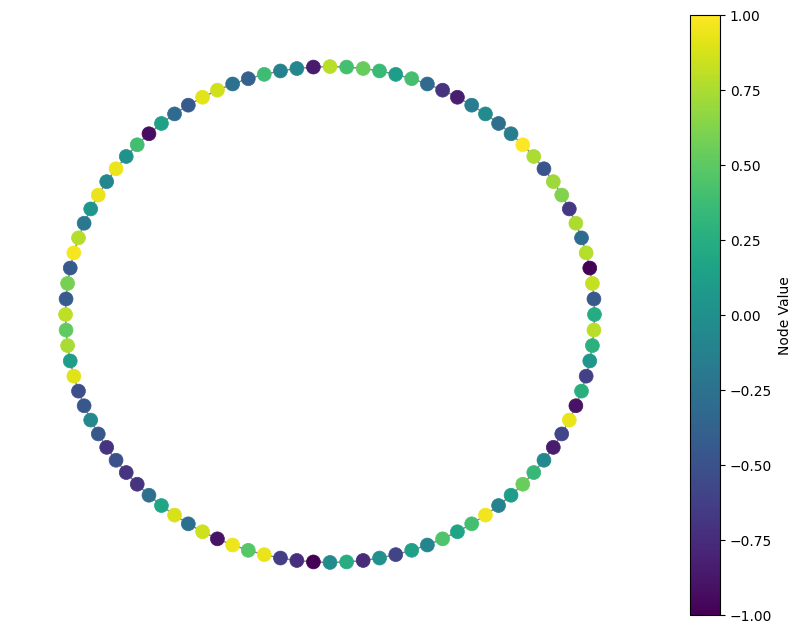

In [234]:
def draw_network(G, X):
    plt.figure(figsize=(8,6))  # Adjust figure size
    pos = nx.circular_layout(G)
    vmin = -1
    vmax = 1
    
    # Draw the graph with improved aesthetics
    nx.draw(
        G,
        pos,
        node_color=X,
        node_size=100,  # Adjusted node size
        cmap='viridis',  # Changed colormap
        edge_color='gray',  # Edge color for contrast
        linewidths=0.5,  # Thickness of node borders
    )
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm, ax=plt.gca(), label='Node Value')  # Add label to colorbar
    
    # Compute adjacency matrix
    A = nx.to_numpy_array(G)
    return A

# Initialize random node values
X_ini = np.random.rand(N)

# Draw the network and get the adjacency matrix
adj_matrix = draw_network(G, X_ini)
plt.show()


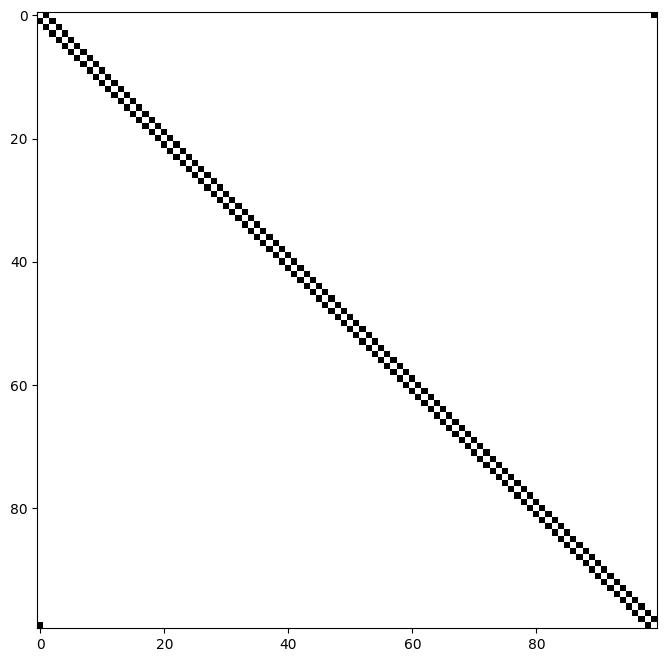

In [235]:
# to visualize the adjency matrix
plt.figure().set_size_inches(8,8)
plt.imshow(adj_matrix,cmap='binary',origin='upper',aspect='auto');

In [236]:
def logistic_map(r, x):
    y = r * x * (1 - x)
    return y

C:\Users\Deepa\AppData\Local\Temp\ipykernel_10896\3891959909.py:2: RuntimeWarning: overflow encountered in scalar multiply
  y = r * x * (1 - x)


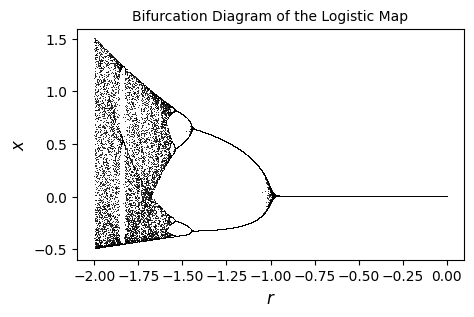

In [277]:
R = np.linspace(-2,0,100000)

A=[]
B=[]

for r in R:
    x = np.random.uniform(0,4)
    for _ in range(100):
        x= logistic_map(r,x)
    A.append(r)
    B.append(x)

plt.figure(figsize=(5,3))
plt.plot(A,B,ls='',marker=',',color='black', alpha=0.8)
plt.title("Bifurcation Diagram of the Logistic Map", fontsize=10, color='black')
plt.xlabel("$r$", fontsize=12, color='black')
plt.ylabel("$x$", fontsize=12, color='black')
plt.tick_params(colors='black')
plt.show()

In [238]:
def quadratic_logistic_map(a, x):
    f = 1 - a * x * x
    return f

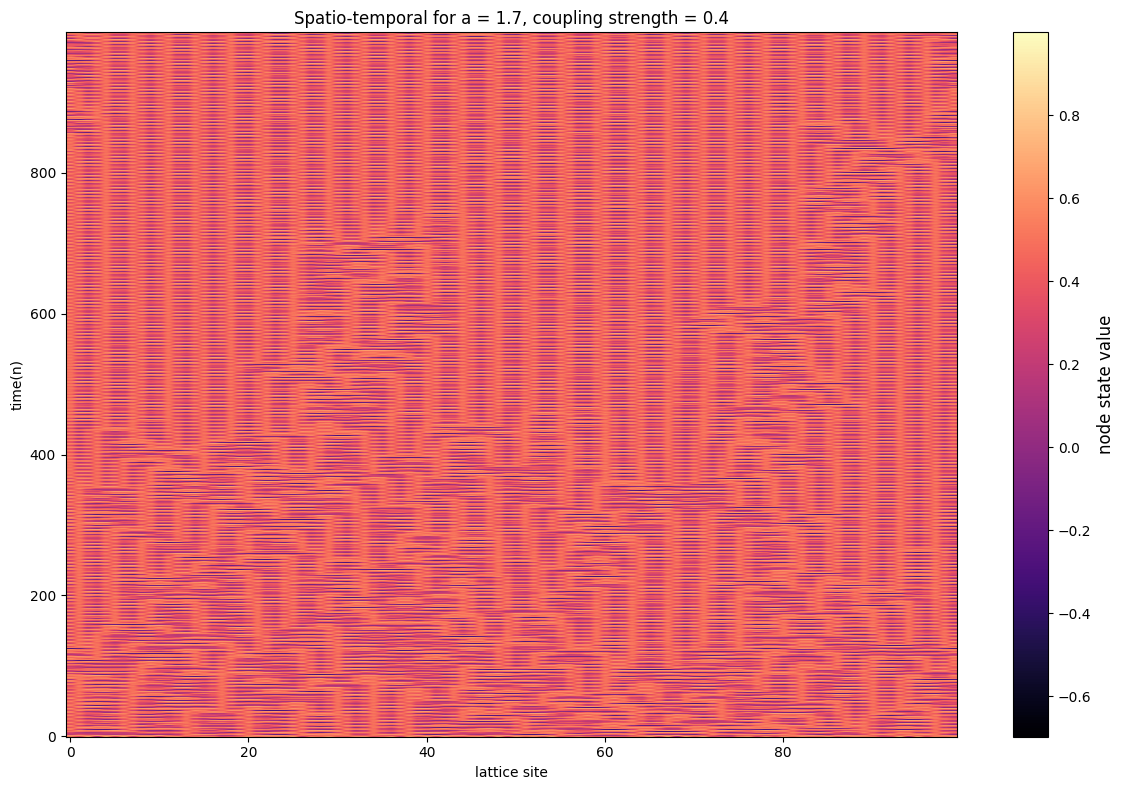

In [263]:

def iterate(f,A,X_ini,e,a,iterations=1000,n=1,M=100):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini
    for k in range(1, iterations):
        Af_term = np.sum(np.multiply(A, f(a, X[:, k-1])).T, axis=0)
        X[:, k] = (1 - e) * f(a, X[:, k-1]) + 0.5 * e * Af_term    
        
    plt.figure(figsize=(12,8))
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='magma')

    cbar = plt.colorbar()
    cbar.set_label('node state value',fontsize = 12)

    plt.xlabel('lattice site')
    plt.ylabel('time(n)')
    plt.grid(False)
    plt.title('Spatio-temporal for a = ' + str(a) + ', coupling strength = ' + str(e))
    plt.tight_layout()
    return X
a = 1.7
e = 0.4
fin_X = iterate(quadratic_logistic_map, adj_matrix, X_ini, e, a, 1000, n=1, M = 10000)

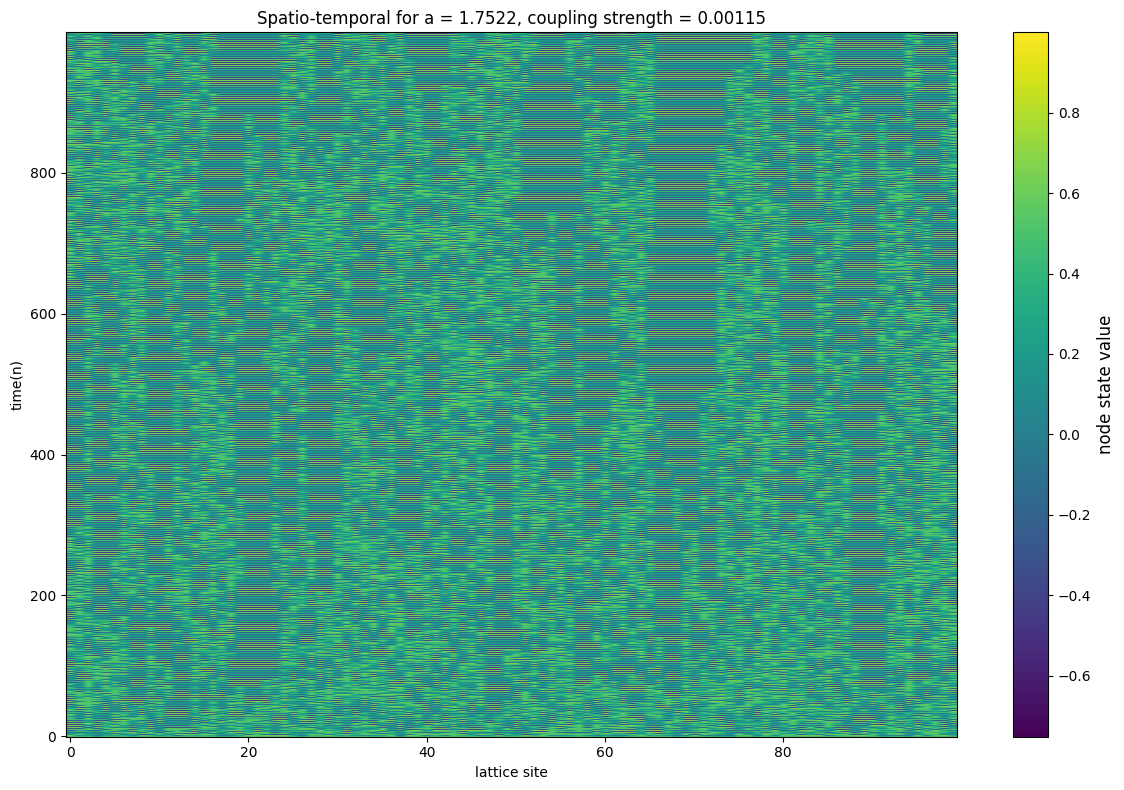

In [278]:
# def iterate(X_ini, A, f, e, a, iterations = 1000,n = 10, M = 100):
def iterate(f,A,X_ini,e,a,iterations=1000,n=1,M=1000):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini
    for k in range(1, iterations):
        Af_term = np.sum(np.multiply(A, f(a, X[:, k-1])).T, axis=0)
        X[:, k] = (1 - e) * f(a, X[:, k-1]) + 0.5 * e * Af_term
        
    plt.figure(figsize=(12,8))
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='viridis')
    
    cbar = plt.colorbar()
    cbar.set_label('node state value',fontsize = 12)

    plt.xlabel('lattice site')
    plt.ylabel('time(n)')
    plt.grid(False)
    plt.title('Spatio-temporal for a = ' + str(a) + ', coupling strength = ' + str(e))
    plt.tight_layout()
    return X
a = 1.7522
e = 0.00115
fin_X = iterate(quadratic_logistic_map, adj_matrix, X_ini, e, a, 1000)

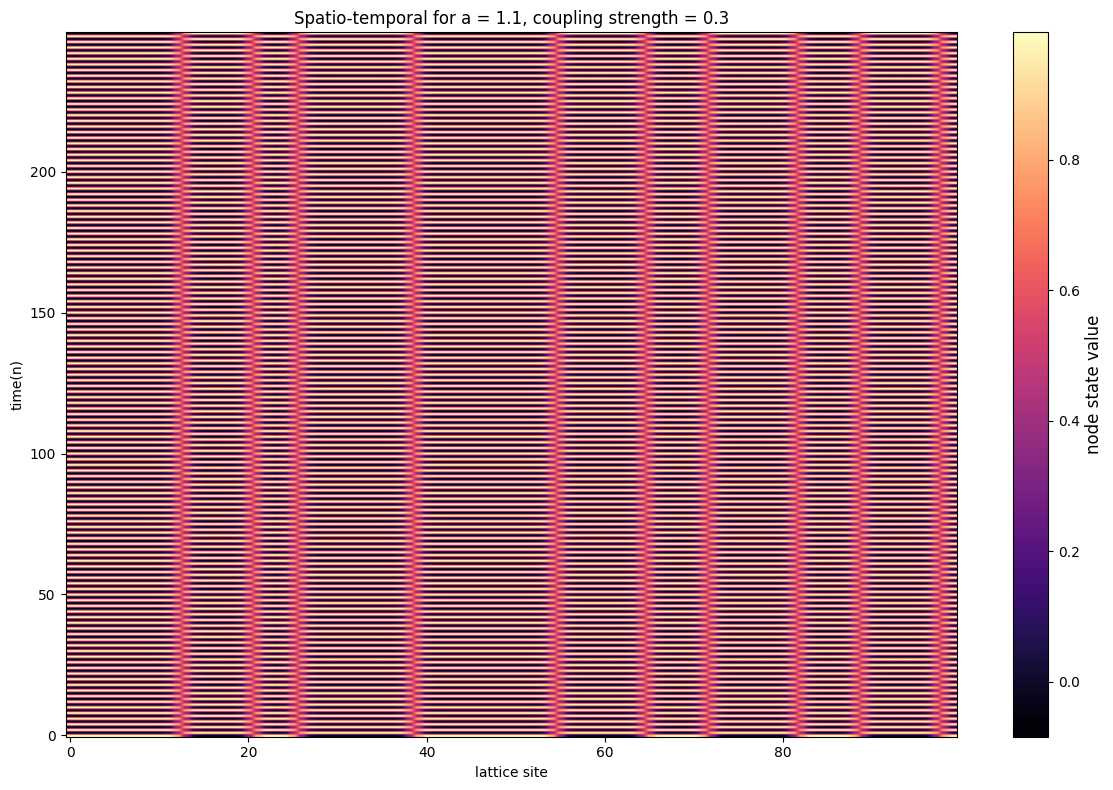

In [313]:
# def iterate(X_ini, A, f, e, a, iterations = 1000,n = 10, M = 100):
def iterate(f,A,X_ini,e,a,iterations=500,n=1,M=250):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini
    for k in range(1, iterations):
        Af_term = np.sum(np.multiply(A, f(a, X[:, k-1])).T, axis=0)
        X[:, k] = (1 - e) * f(a, X[:, k-1]) + 0.5 * e * Af_term
        
    plt.figure(figsize=(12,8))
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='magma')
    
    cbar = plt.colorbar()
    cbar.set_label('node state value',fontsize = 12)

    plt.xlabel('lattice site')
    plt.ylabel('time(n)')
    plt.grid(False)
    plt.title('Spatio-temporal for a = ' + str(a) + ', coupling strength = ' + str(e))
    plt.tight_layout()
    return X
a = 1.1
e = 0.3
fin_X = iterate(quadratic_logistic_map, adj_matrix, X_ini, e, a)

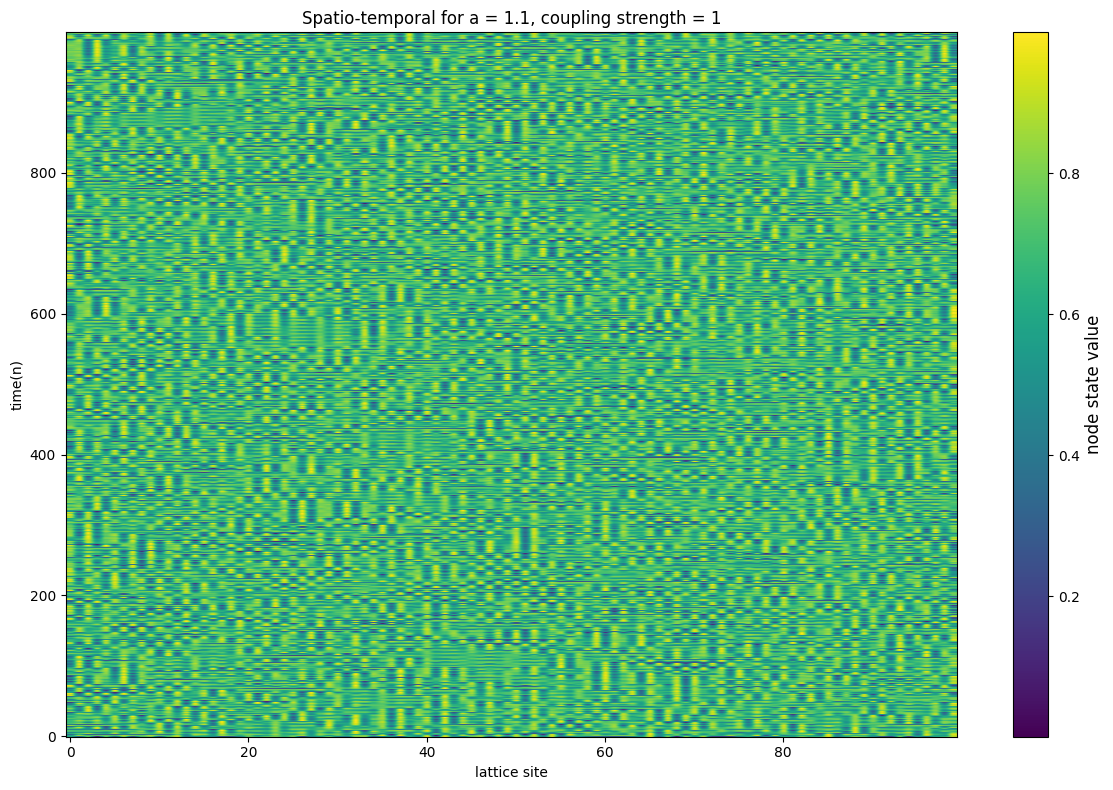

In [335]:
def iterate(g,A,X_ini,e,r,iterations=1000,n=1,M=1000):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini

    for k in range(1, iterations):
        Ag_term = np.sum(np.multiply(A, g(r, X[:, k-1])).T, axis=0)
        X[:, k] = (1 - e) * g(r, X[:, k-1]) + 0.5 * e * Ag_term

    plt.figure(figsize=(12,8))
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='viridis')
    
    cbar = plt.colorbar()
    cbar.set_label('node state value',fontsize = 12)

    plt.xlabel('lattice site')
    plt.ylabel('time(n)')
    plt.grid(False)
    plt.title('Spatio-temporal for a = ' + str(a) + ', coupling strength = ' + str(e))
    plt.tight_layout()
    return X

r = 4
e = 1


fin_X = iterate(logistic_map, adj_matrix, X_ini, e, r, 1000)

In [336]:
def phase_transition_map(x):
    p = np.tanh(x)
    return p

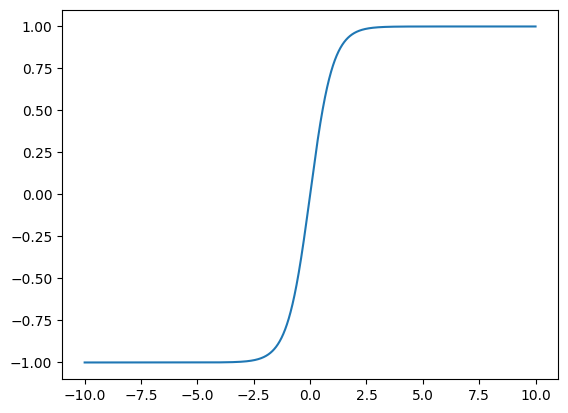

In [377]:
x = np.arange(-10,10,0.001)
y = phase_transition_map(x)
plt.plot(x,y)
plt.show() 

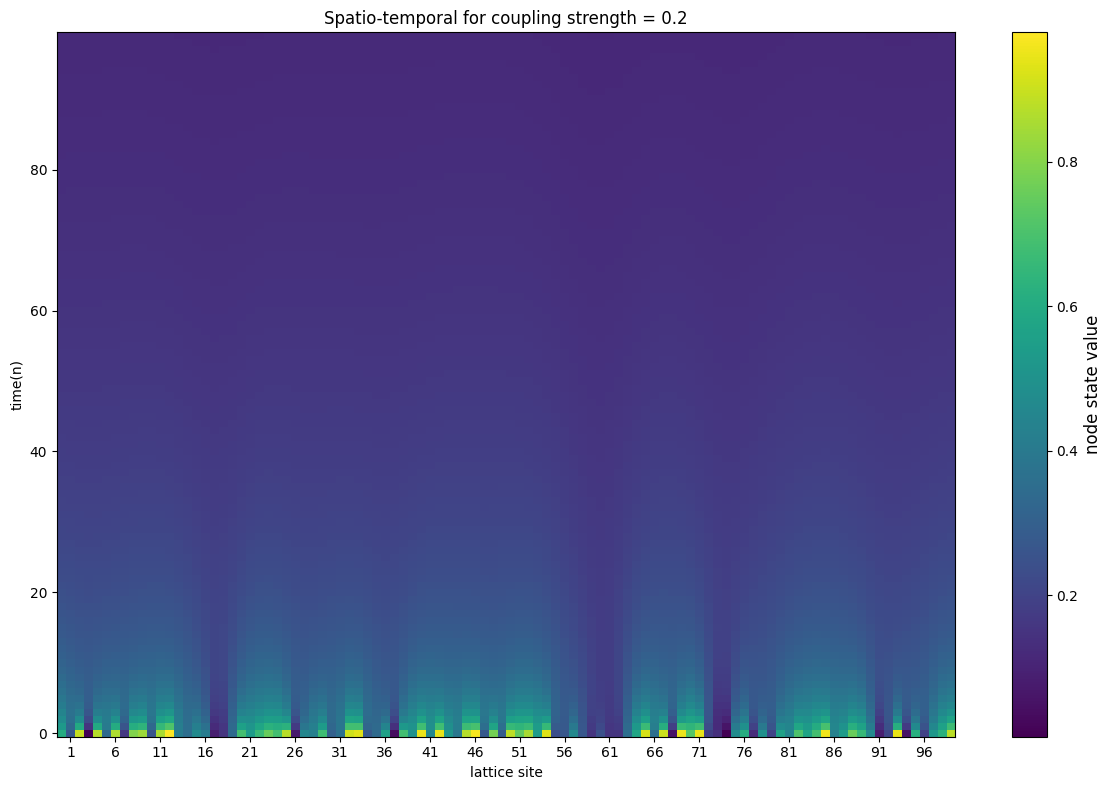

In [347]:
# def iterate(X_ini, A, f, e, a, iterations = 1000,n = 10, M = 100):
def iterate(p,A,X_ini,e,iterations=1000,n=1,M=100):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini

    for k in range(1, iterations):
        Ap_term = np.sum(np.multiply(A, p(X[:, k-1])).T, axis=0)
        X[:, k] = (1 - e) * p(X[:, k-1]) + 0.5 * e * Ap_term

    plt.figure(figsize=(12,8))
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='viridis')
    
    cbar = plt.colorbar()
    cbar.set_label('node state value',fontsize = 12)

    plt.xticks(np.arange(1,X.shape[0],5))
    plt.yticks(fontsize=10)
    plt.xlabel('lattice site')
    plt.ylabel('time(n)')
    plt.grid(False)
    plt.title('Spatio-temporal for coupling strength = ' + str(e))
    plt.tight_layout()
    return X

e = 0.2
fin_X = iterate(phase_transition_map, adj_matrix, X_ini, e, 100)

In [244]:
def circle_map(w, x):
    y = x + w - (1/2 * np.pi) * np.sin(2 * np.pi * x)
    return y

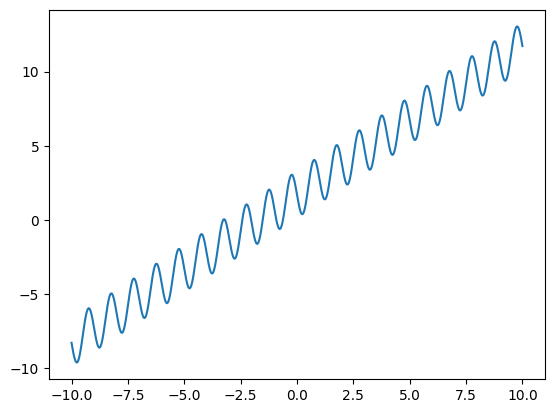

In [349]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.001)
y = circle_map(w, x)
plt.plot(x,y)
plt.show() 

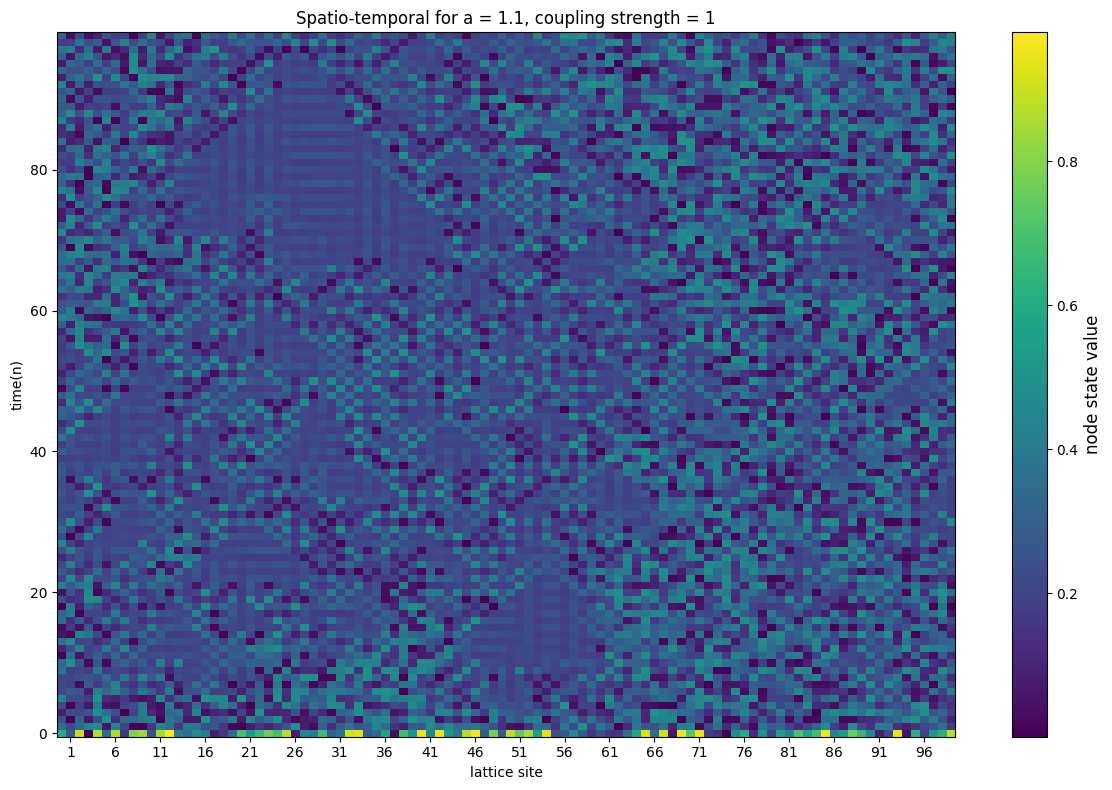

In [368]:
# def iterate(X_ini, A, f, e, a, iterations = 1000,n = 10, M = 100):
def iterate(y,A,X_ini,e,w,iterations=1000,n=1,M=100):
    # initialize
    N = len(X_ini)
    X = np.zeros([N, iterations])
    X [:,0] = X_ini

    for k in range(1, iterations):
        Ay_term = (np.sum(np.multiply(A, y(w, X[:, k-1])).T, axis=0)) % 1
        X[:, k] = (1 - e) * y(a, X[:, k-1]) + 0.5 * e * Ay_term

    plt.figure(figsize=(12,8))
    plt.imshow(X.T[-M::n,:], origin='lower', aspect='auto', cmap='viridis')

    
    cbar = plt.colorbar()
    cbar.set_label('node state value',fontsize = 12)

    plt.xticks(np.arange(1,X.shape[0],5))
    plt.yticks(fontsize=10)
    plt.xlabel('lattice site')
    plt.ylabel('time(n)')
    plt.grid(False)
    plt.title('Spatio-temporal for a = ' + str(a) + ', coupling strength = ' + str(e))
    plt.tight_layout()
    return X

w = 0.009
e = 1

fin_X = iterate(circle_map,adj_matrix,X_ini,e,w,100)

C:\Users\Deepa\AppData\Local\Temp\ipykernel_10896\361066302.py:16: RuntimeWarning: divide by zero encountered in log
  result.append(np.log(abs(r - 2*r*x))) # derivative
C:\Users\Deepa\AppData\Local\Temp\ipykernel_10896\3891959909.py:2: RuntimeWarning: overflow encountered in scalar multiply
  y = r * x * (1 - x)


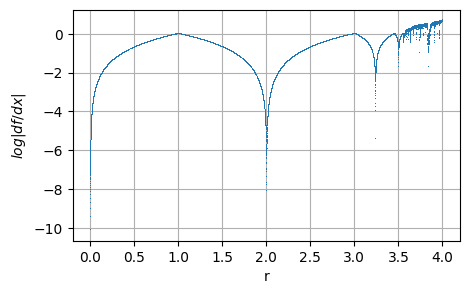

In [376]:
## lyapunov exponent

R = np.linspace(0,4,100000)

lyapunov_exp = []
result = []

for r in R:
    x = np.random.uniform(0,4)
    for _ in range(100):
        x = logistic_map(r,x)
    result = []

    for _ in range(100):
        x = logistic_map(r, x)
        result.append(np.log(abs(r - 2*r*x))) # derivative

    lyapunov_exp.append(np.mean(result))

plt.figure(figsize=(5,3))
plt.grid()
plt.xlabel('r')
plt.ylabel(f'$log|df/dx|$')
plt.plot(R, lyapunov_exp, ls='',marker=',',alpha = 1)
plt.show()

A similar production from the paper on Coupled map lattice model for convection

In [379]:
def buoyancy(E, v, c_b):
    N = len(E)
    v_new = v.copy()
    for i in range(1, N - 1):
        v_new[i] += c_b * (2 * E[i] - E[i - 1] - E[i + 1])
    return v_new

In [ ]:
def heat_diffusion(E, k_h):
    N = len(E)
    E_new = E.copy()
    for i in range(1, N - 1):
        E_new[i] += k_h * (E[i - 1] + E[i + 1] - 2 * E[i])
    return E_new

In [381]:
def viscosity(v, nu):
    N = len(v)
    v_new = v.copy()
    for i in range(1, N - 1):
        v_new[i] += nu * (v[i - 1] + v[i + 1] - 2 * v[i])
    return v_new

In [ ]:
def eulerian_update(E, v, c_b, k_h, nu):
    v_new = buoyancy(E, v, c_b)
    v_new = viscosity(v_new, nu)
    E_new = heat_diffusion(E, k_h)
    return E_new, v_new

In [ ]:
def advect(E, v, delta_t, N):
    E_advected = np.zeros_like(E)
    for i in range(1, N - 1):
        shift = int(v[i] * delta_t)
        if 0 <= i + shift < N:
            E_advected[i + shift] += E[i]
    return E_advected

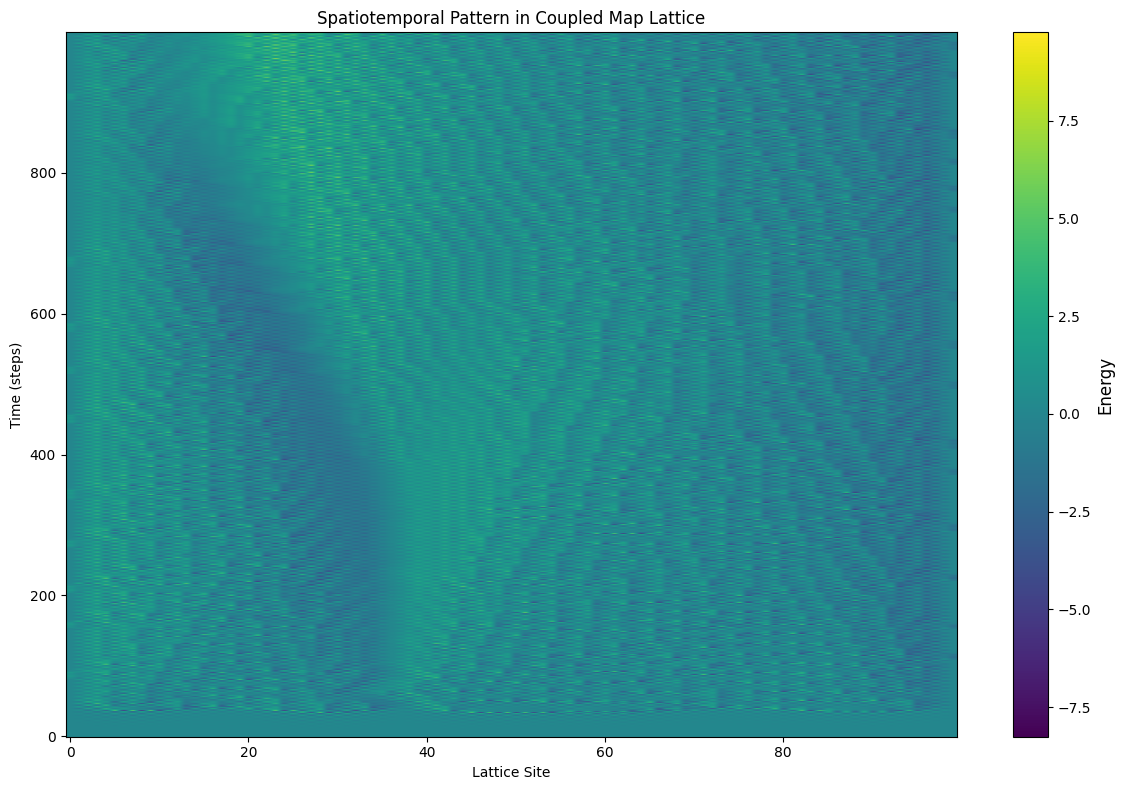

In [417]:
def simulate_cml(N, iterations, c_b, k_h, nu, delta_t, coupling_strength, init_E, init_v):
    E = np.zeros((N, iterations))
    v = np.zeros((N, iterations))
    E[:, 0] = init_E
    v[:, 0] = init_v
    
    for t in range(1, iterations):
        E_new, v_new = eulerian_update(E[:, t - 1], v[:, t - 1], c_b, k_h, nu)
        E_advected = advect(E_new, v_new, delta_t, N)
        
        E[:, t] = (1 - coupling_strength) * E_new + coupling_strength * E_advected
        v[:, t] = v_new
        
    plt.figure(figsize=(12, 8))
    plt.imshow(E.T, origin='lower', aspect='auto', cmap='viridis')
    cbar = plt.colorbar()
    cbar.set_label('Energy', fontsize=12)
    plt.xlabel('Lattice Site')
    plt.ylabel('Time (steps)')
    plt.title('Spatiotemporal Pattern in Coupled Map Lattice')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return E, v

N = 100
iterations = 1000
c_b = 0.5
k_h = 0.55
nu = 0.09
delta_t = 0.2
coupling_strength = 0.5

init_E = np.random.rand(N) * 0.1
init_v = np.zeros(N)

E, v = simulate_cml(N, iterations, c_b, k_h, nu, delta_t, coupling_strength, init_E, init_v)

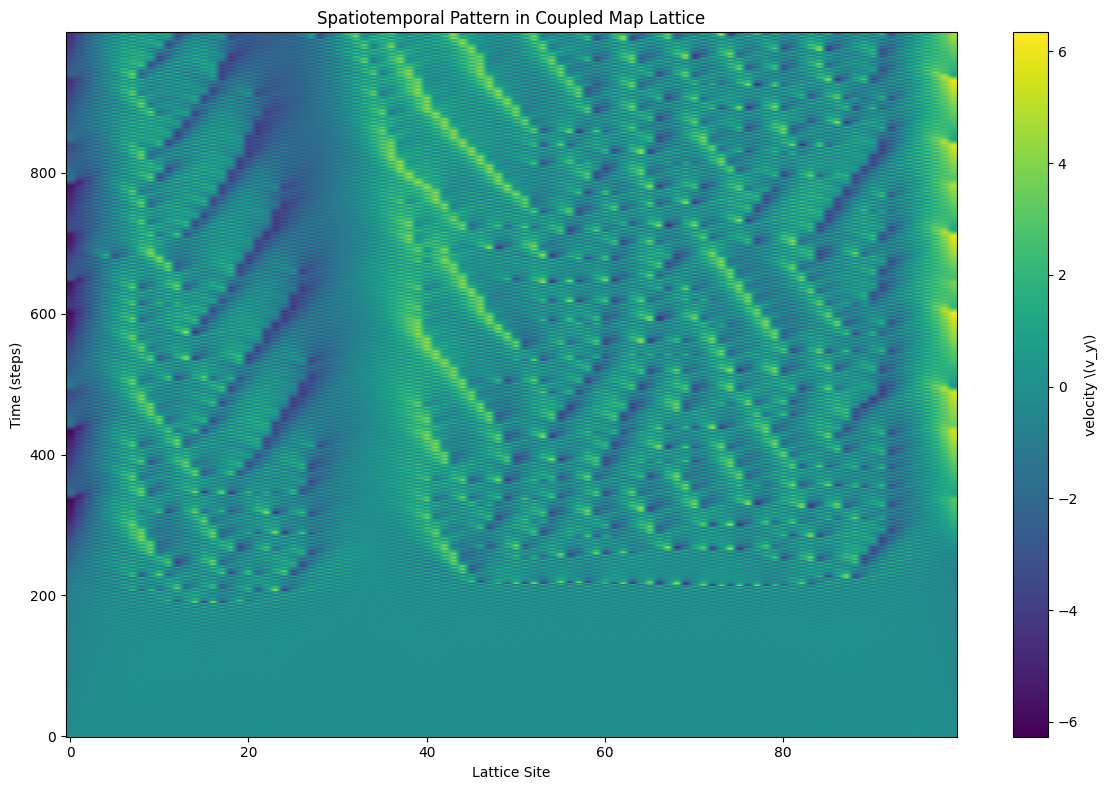

In [422]:
## plot for velocity

def simulate_vy(N, iterations, c_b, k_h, nu, delta_t, coupling_strength, init_E, init_v):
    E = np.zeros((N, iterations))
    v = np.zeros((N, iterations))
    E[:, 0] = init_E
    v[:, 0] = init_v
    
    for t in range(1, iterations):
        E_new, v_new = eulerian_update(E[:, t - 1], v[:, t - 1], c_b, k_h, nu)
        E_advected = advect(E_new, v_new, delta_t, N)
        
        E[:, t] = (1 - coupling_strength) * E_new + coupling_strength * E_advected
        v[:, t] = v_new
        
    plt.figure(figsize=(12, 8))
    plt.imshow(v.T, origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label = 'velocity \(v_y\)')
    plt.xlabel('Lattice Site')
    plt.ylabel('Time (steps)')
    plt.title('Spatiotemporal Pattern in Coupled Map Lattice')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return v

N = 100
iterations = 1000
c_b = 0.5
kappa = 0.509
nu = 0.09
delta_t = 0.2
coupling_strength = 0.5


init_E = np.random.rand(N) * 0.1
init_v = np.random.rand(N) * 0.1 - 0.05

vy = simulate_vy(N, iterations, c_b, kappa, nu, delta_t, eta, init_E, init_v)

C:\Users\Deepa\AppData\Local\Temp\ipykernel_10896\2844002850.py:27: RuntimeWarning: overflow encountered in multiply
  E = E - delta_T * v_y * (np.roll(E, -1, axis=0) - np.roll(E, 1, axis=0)) / 2
C:\Users\Deepa\AppData\Local\Temp\ipykernel_10896\2844002850.py:15: RuntimeWarning: invalid value encountered in add
  return coeff * (np.roll(field, 1, axis=0) + np.roll(field, -1, axis=0) - 2 * field)
C:\Users\Deepa\AppData\Local\Temp\ipykernel_10896\2844002850.py:15: RuntimeWarning: invalid value encountered in subtract
  return coeff * (np.roll(field, 1, axis=0) + np.roll(field, -1, axis=0) - 2 * field)
C:\Users\Deepa\AppData\Local\Temp\ipykernel_10896\2844002850.py:30: RuntimeWarning: invalid value encountered in add
  E = E + diffusion(E, kappa)


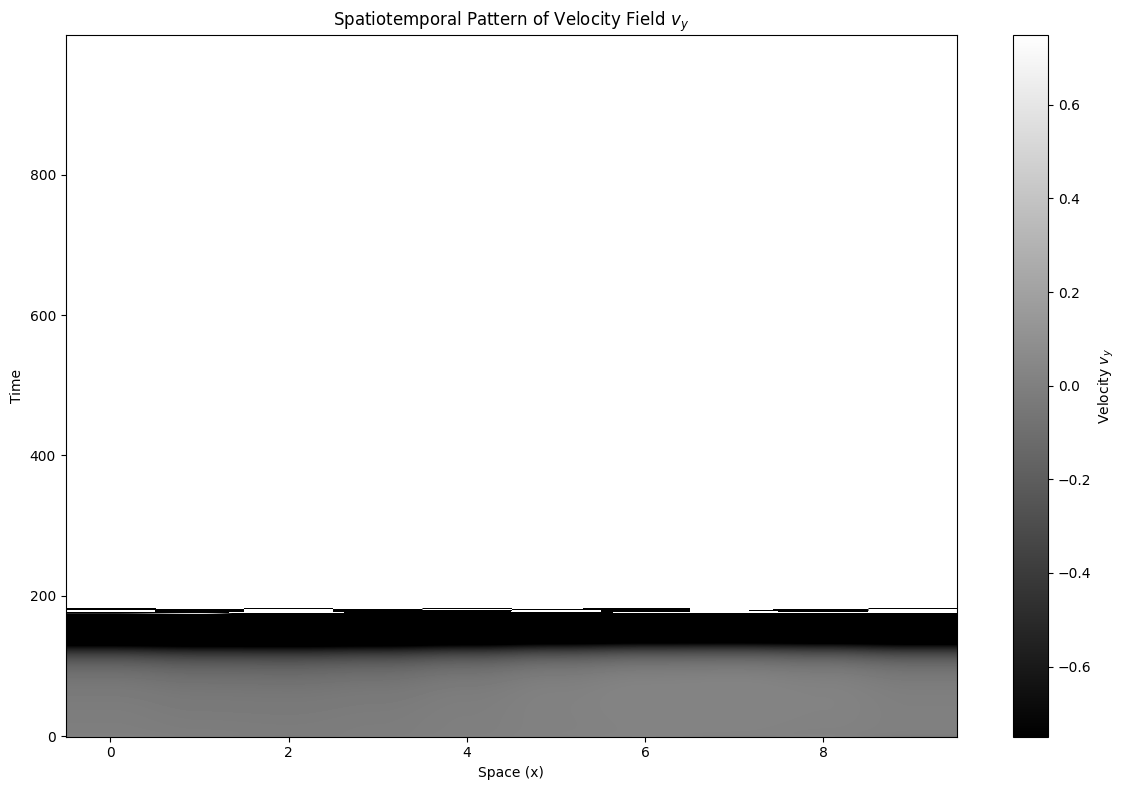

In [394]:
N_x, N_y = 10, 17  # Grid size
iterations = 1000  # Time steps
nu = 0.2  # Viscosity coefficient
kappa = 0.4  # Diffusion coefficient
eta = 0.3  # Coupling strength
delta_T = 1.2  # Time step
c_b = 0.3  # Buoyancy coefficient

# Initialize the fields
v_y = np.random.uniform(-0.05, 0.05, (N_x, N_y))  # Small initial velocity
E = np.random.uniform(0.0, 0.1, (N_x, N_y))  # Small random energy

# Functions for spatial derivatives (1D for simplicity)
def diffusion(field, coeff):
    return coeff * (np.roll(field, 1, axis=0) + np.roll(field, -1, axis=0) - 2 * field)

def buoyancy(E, v_y, c_b):
    return v_y + c_b * (2 * E - np.roll(E, 1, axis=0) - np.roll(E, -1, axis=0))

# Time evolution
v_y_time = np.zeros((N_x, iterations))
for t in range(iterations):
    # Eulerian step
    v_y = (1 - eta) * v_y + eta * (diffusion(v_y, kappa) + nu * v_y + buoyancy(E, v_y, c_b))
    
    # Advect energy field
    E = E - delta_T * v_y * (np.roll(E, -1, axis=0) - np.roll(E, 1, axis=0)) / 2
    
    # Diffuse energy
    E = E + diffusion(E, kappa)
    
    # Store the velocity field for visualization (slice at y = N_y // 2)
    v_y_time[:, t] = v_y[:, N_y // 2]

# Plot the spatiotemporal pattern
plt.figure(figsize=(12, 8))
plt.imshow(v_y_time.T, origin="lower", aspect="auto", cmap="gray", vmin=-0.75, vmax=0.75)
plt.colorbar(label='Velocity $v_y$')
plt.xlabel("Space (x)")
plt.ylabel("Time")
plt.title("Spatiotemporal Pattern of Velocity Field $v_y$")
plt.tight_layout()
plt.show()
